In [35]:
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import math

In [54]:
kibergrad = pd.read_csv('Kibergrad.csv')
kibergrad.columns = kibergrad.columns.str.replace("'", "").str.strip()
N = kibergrad.shape[0]

In [37]:
nakljucni_vzorec_200 = kibergrad.sample(n=200, random_state=42)
print(nakljucni_vzorec_200)

# Filtriranje vrstic, kjer je izobrazba <= 38
stevilo_do_38 = nakljucni_vzorec_200[nakljucni_vzorec_200['IZOBRAZBA'] <= 38].shape[0]

# Izpis rezultata
print(f"Število oseb z izobrazbo največ 38: {stevilo_do_38}")
delez_brez_srednje = stevilo_do_38 / 200
print(f"Vzorčni delež oseb z izobrazbo največ 38: {delez_brez_srednje}")

       TIP  CLANOV  OTROK  DOHODEK  CETRT  IZOBRAZBA
42834    1       3      0    32829      4         39
37200    1       4      0    52752      4         40
5195     1       4      2    75274      1         43
28449    3       2      1     4718      3         40
6699     1       5      3    27524      1         36
...    ...     ...    ...      ...    ...        ...
9928     1       4      0    28916      1         39
39975    1       3      1    26250      4         44
29912    1       3      0    52040      3         40
12141    3       3      2    27065      2         43
25119    1       2      0    19980      3         39

[200 rows x 6 columns]
Število oseb z izobrazbo največ 38: 43
Vzorčni delež oseb z izobrazbo največ 38: 0.215


Uporabimo formulo za oceno standardne napake deleža (nepristranska cenilka za $ \sigma (\hat p)$):

$$\hat {SE} = \sqrt{\frac{\hat p (1- \hat p)}{n - 1} \cdot \left(1 - \frac{n}{N}\right)},$$

kjer je $\hat p$ vzorčni delež, $N$ velikost populacije in $n$ velikost vzorca.
Faktor $1 - \frac{n}{N}$ pod korenom je popravek za končne populacije.

 (Vir: John A. Rice: Mathematical Statistics and data analysis, 1995, razdelek 7.3.2, stran 198)

In [38]:
standardna_napaka =  math.sqrt(delez_brez_srednje * (1 - delez_brez_srednje) * (1 - 200/N) / 199) #formula za OCENO standardne napake
print(f"Ocenjena standardna napaka: {standardna_napaka}")

Ocenjena standardna napaka: 0.029055988935110685


Torej je aproksimativen interval zaupanja za vzorčni delež:

$$ \hat p \pm \Phi ^{-1}\left(1- \frac {\alpha}{2}\right)\sqrt{\frac{\hat p (1- \hat p)}{n - 1} \cdot \left(1 - \frac{n}{N}\right)},$$

kar pri stopnji zaupanja 95% da:

$$\hat p \pm 1.96 \sqrt{\frac{\hat p (1- \hat p)}{n - 1} \cdot \left(1 - \frac{n}{N}\right)}.$$

In [39]:
sp_meja = delez_brez_srednje - 1.96*standardna_napaka
zg_meja = delez_brez_srednje + 1.96*standardna_napaka

In [40]:
print((sp_meja, zg_meja))

(0.15805026168718306, 0.27194973831281694)


In [41]:
# Filtriranje vrstic, kjer je izobrazba <= 38
populacija_stevilo_do_38 = kibergrad[kibergrad['IZOBRAZBA'] <= 38].shape[0]
print(populacija_stevilo_do_38)

9282


In [42]:
delez = populacija_stevilo_do_38/43886
print(delez)

0.21150252928040833


Po istem viru (str. 199), je formula za pravo standardno napako:

$$ {SE} = \sqrt{\frac{ p (1-  p)}{n} \cdot \frac{N-n}{N-1}},$$

In [43]:
#Tako za pravo standardno napako dobimo:
standardna_napaka =  math.sqrt(delez * (1 - delez) * (N -200) / (200 * (N-1)))
print(f"Prava standardna napaka: {standardna_napaka}")

Prava standardna napaka: 0.028810847022556974


In [66]:
import math
import matplotlib.pyplot as plt



alpha = 0.05  # za 95% interval zaupanja

def vzorcenje(n):
  intervali = []
  zajeti = []
  delezi =[]
  for i in range(100):  # 100 vzorcev
      vzorec = kibergrad.sample(n=n, random_state=i)

      # Preštej, koliko ima izobrazbo <= 38
      stevilo_do_38 = (vzorec['IZOBRAZBA'] <= 38).sum()
      delez_brez_srednje = stevilo_do_38 / n

      # Standardna napaka za delež
      standardna_napaka = math.sqrt(delez_brez_srednje * (1 - delez_brez_srednje) * (1 - n/N) / (n-1)) # formula za OCENO standardne napake

      # Interval zaupanja (95%)
      levo = delez_brez_srednje - 1.96 * standardna_napaka
      desno = delez_brez_srednje + 1.96 * standardna_napaka

      # Dodaj interval in standard error (SE) v seznam
      intervali.append((levo, desno, delez_brez_srednje))

      # Preveri, če pravi delež (lahko uporabiš npr. povprečje celotnih podatkov) spada v interval
      # Tukaj bomo privzeli, da je prava vrednost povprečje celotnega podatka:
      prava_vrednost = (kibergrad['IZOBRAZBA'] <= 38).mean()
      zajeti.append(levo <= prava_vrednost <= desno)
      delezi.append(delez_brez_srednje)
  delezi.append(delez_brez_srednje)
  print(delezi)

  # Izris grafa
  plt.figure(figsize=(10, 6))
  for i, (levo, desno, SE) in enumerate(intervali):
      barva = 'green' if zajeti[i] else 'red'
      plt.plot([levo, desno], [i, i], color=barva)
      plt.plot(SE, i, 'k|', markersize=6)

  plt.axvline(x=prava_vrednost, color='blue', linestyle='--', label='Pravi delež')
  plt.xlabel('Delež oseb z izobrazbo ≤ 38')
  plt.ylabel('Vzorec')
  plt.title(f'95% intervali zaupanja za 100 vzorcev (n={n})')
  plt.legend()
  plt.tight_layout()
  plt.show()

  print("Število intervalov, ki zajamejo pravi delež:", sum(zajeti))

  return np.std(delezi, ddof=1)


[np.float64(0.225), np.float64(0.18), np.float64(0.18), np.float64(0.185), np.float64(0.18), np.float64(0.21), np.float64(0.215), np.float64(0.22), np.float64(0.21), np.float64(0.2), np.float64(0.185), np.float64(0.18), np.float64(0.18), np.float64(0.19), np.float64(0.22), np.float64(0.22), np.float64(0.23), np.float64(0.175), np.float64(0.19), np.float64(0.235), np.float64(0.24), np.float64(0.19), np.float64(0.245), np.float64(0.19), np.float64(0.185), np.float64(0.165), np.float64(0.215), np.float64(0.185), np.float64(0.215), np.float64(0.185), np.float64(0.22), np.float64(0.18), np.float64(0.22), np.float64(0.25), np.float64(0.245), np.float64(0.215), np.float64(0.17), np.float64(0.16), np.float64(0.215), np.float64(0.23), np.float64(0.17), np.float64(0.205), np.float64(0.215), np.float64(0.24), np.float64(0.21), np.float64(0.175), np.float64(0.185), np.float64(0.235), np.float64(0.155), np.float64(0.22), np.float64(0.225), np.float64(0.205), np.float64(0.225), np.float64(0.2), np.f

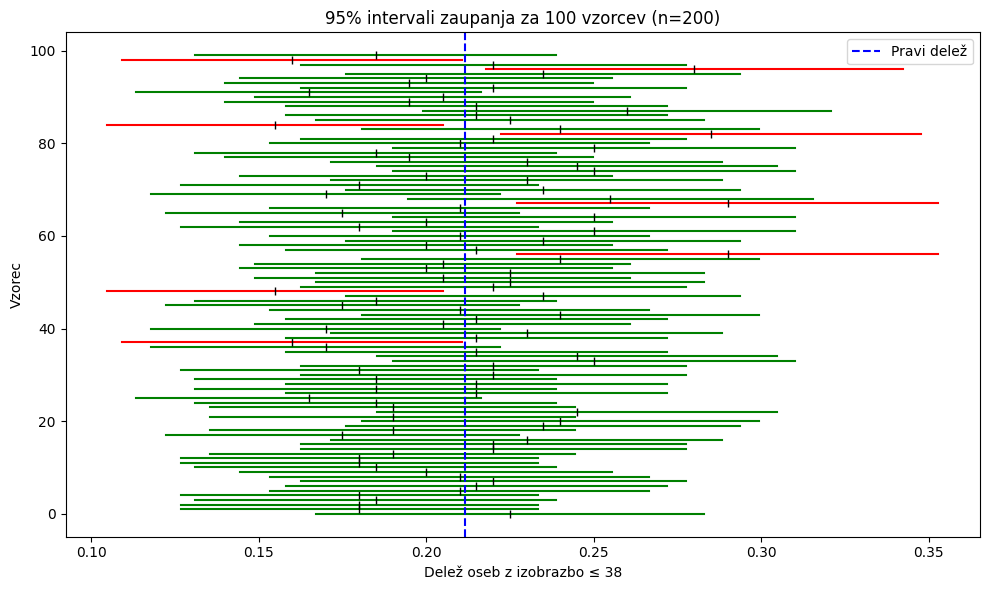

Število intervalov, ki zajamejo pravi delež: 92
Standardni odklon vzorcnih delezev 0.029873247079772045, prava standardna napaka 0.014246290735714385


In [67]:
#Poračunamo standardni odklon:
std_odklon = vzorcenje(n = 200)

print(f"Standardni odklon vzorcnih delezev {std_odklon}, prava standardna napaka {standardna_napaka}")

Še na 100 večjih vzorcih (800 družin)

[np.float64(0.2), np.float64(0.1825), np.float64(0.20875), np.float64(0.22375), np.float64(0.215), np.float64(0.2175), np.float64(0.20875), np.float64(0.25125), np.float64(0.2075), np.float64(0.22375), np.float64(0.23), np.float64(0.18125), np.float64(0.20125), np.float64(0.2125), np.float64(0.21875), np.float64(0.21125), np.float64(0.23), np.float64(0.19625), np.float64(0.20875), np.float64(0.21125), np.float64(0.21625), np.float64(0.2075), np.float64(0.22875), np.float64(0.18625), np.float64(0.1925), np.float64(0.21875), np.float64(0.225), np.float64(0.19625), np.float64(0.2275), np.float64(0.215), np.float64(0.1975), np.float64(0.225), np.float64(0.215), np.float64(0.235), np.float64(0.2125), np.float64(0.2025), np.float64(0.20625), np.float64(0.1975), np.float64(0.19375), np.float64(0.18625), np.float64(0.19875), np.float64(0.23625), np.float64(0.22), np.float64(0.215), np.float64(0.2225), np.float64(0.20375), np.float64(0.20875), np.float64(0.2025), np.float64(0.19125), np.float64

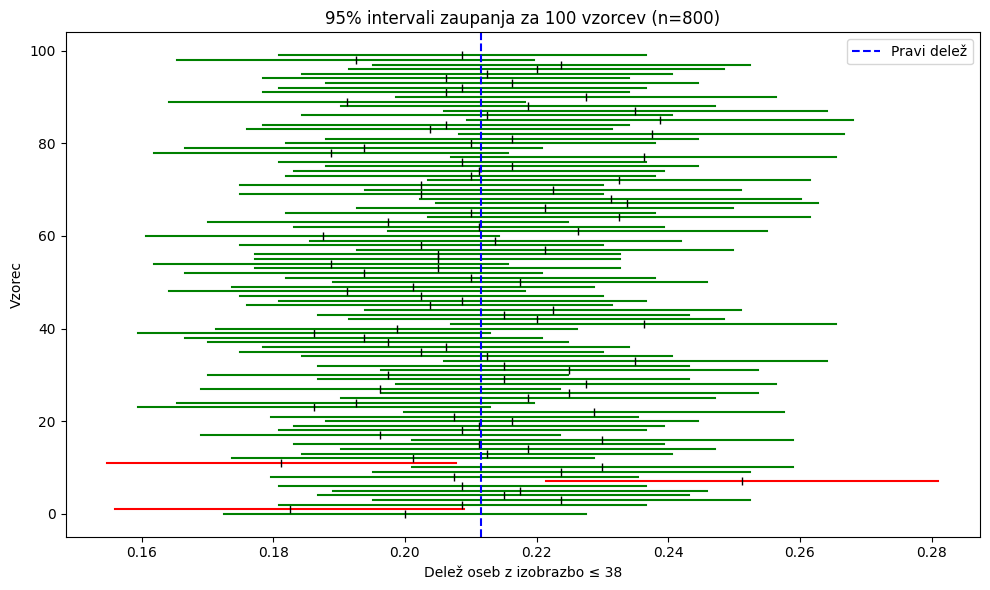

Število intervalov, ki zajamejo pravi delež: 97
0.014187231482171311


In [68]:
#Poračunamo standardni odklon:
std_odklon = vzorcenje(n = 800)

print(std_odklon)

In [69]:
#Prava standardna napaka za vzorec velikosti 800:
print(delez)
standardna_napaka =  math.sqrt(delez * (1 - delez) * (N - 800) / (800 * (N-1)))
print(f"Prava standardna napaka pri vzorcu velikosti 800: {standardna_napaka}")

0.21150252928040833
Prava standardna napaka pri vzorcu velikosti 800: 0.014306156731284972
